In [1]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import and preliminary
- import
- removal of single-valued columns
- check for missing values
- check for columns difference between train/test

In [2]:
DATA_FOLDER = 'dataset'
DATASET_TRAIN = os.path.join(DATA_FOLDER, 'RavdessAudioOnlyFeatures_TRAIN.csv')
DATASET_TEST = os.path.join(DATA_FOLDER, 'RavdessAudioOnlyFeatures_TEST.csv')
PREPROCESSED_TRAIN = os.path.join(DATA_FOLDER, 'preprocessed_dataset_TRAIN.csv')
PREPROCESSED_TEST = os.path.join(DATA_FOLDER, 'preprocessed_dataset_TEST.csv')

In [3]:
df_train = pd.read_csv(DATASET_TRAIN)
df_train.head()

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,filename,frame_count,...,stft_max_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_q99_w4,stft_kur_w4,stft_skew_w4
0,audio-only,speech,neutral,normal,Kids are talking by the door,1st,1,M,03-01-01-01-01-01-01.wav,158558,...,1.0,0.000000,0.566462,0.709962,0.799141,0.896606,1.0,1.0,6.742190,-1.706215
1,audio-only,speech,neutral,normal,Kids are talking by the door,2nd,1,M,03-01-01-01-01-02-01.wav,160160,...,1.0,0.368623,0.472736,0.623183,0.744908,0.874713,1.0,1.0,-0.700420,-0.201495
2,audio-only,speech,neutral,normal,Dogs are sitting by the door,1st,1,M,03-01-01-01-02-01-01.wav,156956,...,1.0,0.000000,0.417919,0.643636,0.774253,0.899156,1.0,1.0,1.688986,-1.024773
3,audio-only,speech,neutral,normal,Dogs are sitting by the door,2nd,1,M,03-01-01-01-02-02-01.wav,152152,...,1.0,0.306280,0.399641,0.606910,0.755213,0.886474,1.0,1.0,-0.594111,-0.412871
4,audio-only,speech,calm,normal,Kids are talking by the door,1st,1,M,03-01-02-01-01-01-01.wav,169769,...,1.0,0.248765,0.428202,0.634815,0.759914,0.878014,1.0,1.0,0.126535,-0.620782


In [4]:
df_test = pd.read_csv(DATASET_TEST)
df_test.head()

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,filename,frame_count,...,stft_max_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_q99_w4,stft_kur_w4,stft_skew_w4
0,audio-only,speech,neutral,normal,Kids are talking by the door,1st,19,M,03-01-01-01-01-01-19.wav,161762,...,1.0,0.306697,0.466157,0.645931,0.789123,0.908316,1.0,1.0,-0.260279,-0.566556
1,audio-only,speech,neutral,normal,Kids are talking by the door,2nd,19,M,03-01-01-01-01-02-19.wav,155355,...,1.0,0.170786,0.279347,0.557524,0.733053,0.866973,1.0,1.0,-0.428900,-0.587210
2,audio-only,speech,neutral,normal,Dogs are sitting by the door,1st,19,M,03-01-01-01-02-01-19.wav,160160,...,1.0,0.023285,0.305395,0.577750,0.741576,0.889984,1.0,1.0,0.626916,-0.883317
3,audio-only,speech,neutral,normal,Dogs are sitting by the door,2nd,19,M,03-01-01-01-02-02-19.wav,158558,...,1.0,0.368081,0.434591,0.620144,0.776419,0.904668,1.0,1.0,-0.825144,-0.383701
4,audio-only,speech,calm,normal,Kids are talking by the door,1st,19,M,03-01-02-01-01-01-19.wav,176176,...,1.0,0.298851,0.393112,0.623309,0.772964,0.907035,1.0,1.0,-0.536669,-0.547354


In [5]:
df_train.shape

(1828, 434)

In [6]:
df_test.shape

(624, 434)

In [7]:
single_value_columns_train = [column for column in df_train.columns if len(df_train[column].unique()) == 1]
len(single_value_columns_train)

52

In [8]:
missing_values_columns_train = [column for column in df_train.columns if df_train[column].isna().any()]
len(missing_values_columns_train)

0

In [9]:
single_value_columns_test = [column for column in df_train.columns if len(df_test[column].unique()) == 1]
len(single_value_columns_test)

50

In [10]:
difference = [column for column in single_value_columns_train if column not in single_value_columns_test]
difference

['zc_q75_w1', 'zc_q75_w2']

In [11]:
missing_values_columns_test = [column for column in df_train.columns if df_train[column].isna().any()]
len(missing_values_columns_test)

0

In [12]:
df = pd.concat([df_train, df_test], ignore_index=True)
df.shape

(2452, 434)

In [13]:
df['actor'] = 'actor_' + df['actor'].astype(str)
df['actor'].head()

0    actor_1
1    actor_1
2    actor_1
3    actor_1
4    actor_1
Name: actor, dtype: object

In [14]:
single_value_columns = [column for column in df_train.columns if len(df[column].unique()) == 1]
single_value_columns

['modality',
 'lag1_q50',
 'zc_min',
 'zc_max',
 'zc_q01',
 'zc_q05',
 'zc_q25',
 'zc_q50',
 'zc_q75',
 'zc_q99',
 'stft_max',
 'stft_q95',
 'stft_q99',
 'lag1_q50_w1',
 'zc_min_w1',
 'zc_max_w1',
 'zc_q01_w1',
 'zc_q05_w1',
 'zc_q25_w1',
 'zc_q50_w1',
 'zc_min_w2',
 'zc_max_w2',
 'zc_q01_w2',
 'zc_q05_w2',
 'zc_q25_w2',
 'zc_q50_w2',
 'zc_q99_w2',
 'stft_max_w2',
 'stft_q95_w2',
 'stft_q99_w2',
 'zc_min_w3',
 'zc_max_w3',
 'zc_q01_w3',
 'zc_q05_w3',
 'zc_q25_w3',
 'zc_q50_w3',
 'zc_q75_w3',
 'zc_q99_w3',
 'stft_max_w3',
 'stft_q95_w3',
 'stft_q99_w3',
 'lag1_q50_w4',
 'zc_min_w4',
 'zc_max_w4',
 'zc_q01_w4',
 'zc_q05_w4',
 'zc_q25_w4',
 'zc_q50_w4',
 'stft_max_w4',
 'stft_q99_w4']

In [15]:
to_drop = ['filename'] + single_value_columns
df = df.drop(to_drop, axis=1)
df.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,frame_count,sum,mean,...,stft_std_w4,stft_min_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
0,speech,neutral,normal,Kids are talking by the door,1st,actor_1,M,158558,0.145081,9.150000e-07,...,0.155455,0.000000,0.000000,0.566462,0.709962,0.799141,0.896606,1.0,6.742190,-1.706215
1,speech,neutral,normal,Kids are talking by the door,2nd,actor_1,M,160160,0.114319,7.137790e-07,...,0.163183,0.270133,0.368623,0.472736,0.623183,0.744908,0.874713,1.0,-0.700420,-0.201495
2,speech,neutral,normal,Dogs are sitting by the door,1st,actor_1,M,156956,0.149963,9.554485e-07,...,0.190634,0.000000,0.000000,0.417919,0.643636,0.774253,0.899156,1.0,1.688986,-1.024773
3,speech,neutral,normal,Dogs are sitting by the door,2nd,actor_1,M,152152,0.139618,9.176213e-07,...,0.182551,0.205616,0.306280,0.399641,0.606910,0.755213,0.886474,1.0,-0.594111,-0.412871
4,speech,calm,normal,Kids are talking by the door,1st,actor_1,M,169769,0.137665,8.108948e-07,...,0.177069,0.177847,0.248765,0.428202,0.634815,0.759914,0.878014,1.0,0.126535,-0.620782


## Distribution correction and transform

### Repeated values
Find repeated values by stationary points of the partition function

In [16]:
from pandas.core.dtypes.common import is_numeric_dtype, is_integer_dtype
numeric_attr_list = [column for column in df.columns if is_numeric_dtype(df[column])]

# Check for global duplicates
print("global duplicates", np.sum(df.duplicated()))

# Get per-attribute duplicate values and duplicates counts
attr_repeated = dict()
values_counts = pd.DataFrame(columns=["attribute", "value", "counts"])

for attr in numeric_attr_list:

    duplicated = df[attr].duplicated()
    attr_repeated[attr] = np.sum(duplicated)

    # Counts how many times a repeated value is repeatd
    for val in np.unique(df[attr].loc[duplicated]):
        counts = np.sum(df[attr] == val)

        # Threshold for being a real duplicate
        if counts > 0.05*len(df):
            row = dict(attribute=attr, value=val, counts=counts)
            row = pd.DataFrame(row, index=[0])
            values_counts = pd.concat([values_counts, row], ignore_index=True)

display(values_counts.sort_values("counts", ascending=False))

global duplicates 0


,attribute,value,counts
97,zc_q75_w2,0.000000,2451
68,zc_q75_w1,0.000000,2451
148,zc_q75_w4,0.000000,2450
158,stft_q95_w4,1.000000,2446
84,stft_max_w1,1.000000,2435
...,...,...,...
112,q05_w4,-0.000092,123
111,q05_w4,-0.000122,123
92,q50_w2,0.000031,123
98,zc_q95_w2,0.000000,123


Test: drop the highly repeated columns. `TODO`: check if they are correlated with someone.

In [17]:
highly_repeated = values_counts[values_counts.counts > 0.3*len(df)].attribute.values
print(np.sort(highly_repeated), len(highly_repeated))
df.drop(columns=highly_repeated)

['lag1_mean' 'lag1_q05_w4' 'lag1_q25_w1' 'lag1_q25_w4' 'lag1_q50_w2'
 'lag1_q50_w3' 'lag1_q75' 'lag1_q75_w1' 'lag1_q75_w4' 'lag1_q95_w4'
 'lag1_sum' 'mfcc_q50' 'mfcc_q50_w1' 'q25_w1' 'q25_w4' 'q50' 'q50_w1'
 'q50_w2' 'q50_w4' 'q75_w1' 'q75_w4' 'sc_min' 'sc_min_w1' 'sc_q01'
 'sc_q01_w1' 'sc_q05_w1' 'stft_max_w1' 'stft_min' 'stft_min_w1' 'stft_q01'
 'stft_q01_w1' 'stft_q05_w1' 'stft_q95_w1' 'stft_q95_w4' 'stft_q99_w1'
 'zc_q75_w1' 'zc_q75_w2' 'zc_q75_w4' 'zc_q95' 'zc_q95_w1' 'zc_q95_w2'
 'zc_q95_w3' 'zc_q95_w4' 'zc_q95_w4' 'zc_q99_w1' 'zc_q99_w4'] 46


,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,frame_count,sum,mean,...,stft_mean_w4,stft_std_w4,stft_min_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_kur_w4,stft_skew_w4
0,speech,neutral,normal,Kids are talking by the door,1st,actor_1,M,158558,0.145081,9.150000e-07,...,0.791036,0.155455,0.000000,0.000000,0.566462,0.709962,0.799141,0.896606,6.742190,-1.706215
1,speech,neutral,normal,Kids are talking by the door,2nd,actor_1,M,160160,0.114319,7.137790e-07,...,0.744699,0.163183,0.270133,0.368623,0.472736,0.623183,0.744908,0.874713,-0.700420,-0.201495
2,speech,neutral,normal,Dogs are sitting by the door,1st,actor_1,M,156956,0.149963,9.554485e-07,...,0.751478,0.190634,0.000000,0.000000,0.417919,0.643636,0.774253,0.899156,1.688986,-1.024773
3,speech,neutral,normal,Dogs are sitting by the door,2nd,actor_1,M,152152,0.139618,9.176213e-07,...,0.736895,0.182551,0.205616,0.306280,0.399641,0.606910,0.755213,0.886474,-0.594111,-0.412871
4,speech,calm,normal,Kids are talking by the door,1st,actor_1,M,169769,0.137665,8.108948e-07,...,0.744390,0.177069,0.177847,0.248765,0.428202,0.634815,0.759914,0.878014,0.126535,-0.620782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447,song,fearful,normal,Dogs are sitting by the door,2nd,actor_24,F,219419,0.423157,1.928533e-06,...,0.610831,0.301240,0.000496,0.003056,0.014688,0.482438,0.678422,0.834269,-0.495689,-0.746055
2448,song,fearful,strong,Kids are talking by the door,1st,actor_24,F,217817,-1.375854,-6.316562e-06,...,0.536033,0.291831,0.002319,0.003847,0.010327,0.336392,0.544155,0.754146,-0.877851,-0.152447
2449,song,fearful,strong,Kids are talking by the door,2nd,actor_24,F,206606,0.573761,2.777078e-06,...,0.511294,0.297616,0.001602,0.004732,0.016150,0.279892,0.516853,0.729066,-0.997740,-0.003013
2450,song,fearful,strong,Dogs are sitting by the door,1st,actor_24,F,203404,0.792572,3.896541e-06,...,0.595262,0.270272,0.006459,0.019884,0.066764,0.408438,0.615354,0.798053,-0.670500,-0.325276


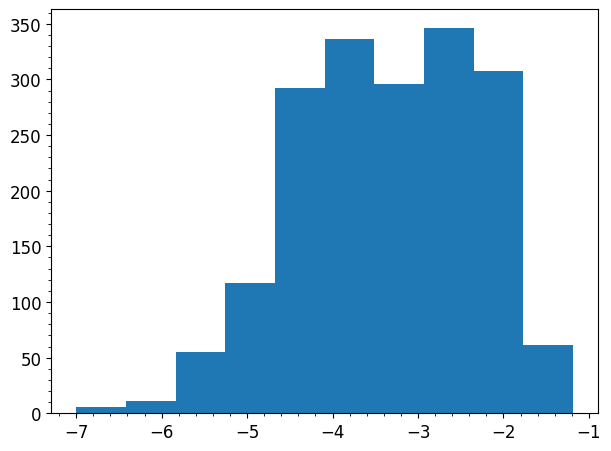

In [18]:
df_train['dummy'] = df_train['std_w1'].copy()
df_train[df_train['dummy'] == 0] = 1e-7
df_train['dummy']  = df_train['dummy'].apply(np.log10)
plt.hist(df_train['dummy'])
plt.show()

In [19]:
from scipy.stats import shapiro

gaussian = []
not_gaussian = []

for i in numeric_attr_list:
    if shapiro(df[i]).pvalue >= 1e-34:
        gaussian.append([i, shapiro(df[i]).pvalue])
    else:
        not_gaussian.append([i, shapiro(df[i]).pvalue])

In [20]:
gaussian

[['frame_count', 2.55486251449485e-24],
 ['skew', 4.3752758442086245e-15],
 ['zc_sum', 4.676701165867503e-22],
 ['zc_mean', 1.8378381547569585e-22],
 ['zc_std', 2.2840590645500924e-06],
 ['zc_kur', 7.478155577162876e-31],
 ['zc_skew', 6.212005168682662e-16],
 ['mfcc_sum', 5.786975315290219e-29],
 ['mfcc_mean', 0.007704547140747309],
 ['mfcc_std', 1.5529281881754287e-05],
 ['mfcc_min', 0.026575790718197823],
 ['mfcc_max', 1.8307626248326159e-10],
 ['mfcc_q01', 3.2850450224941596e-05],
 ['mfcc_q05', 5.935058053572053e-21],
 ['mfcc_q25', 7.828926986948662e-14],
 ['mfcc_q50', 5.352670464476904e-34],
 ['mfcc_q75', 1.0184877948157778e-34],
 ['mfcc_q95', 7.0926509110336156e-09],
 ['mfcc_q99', 2.9961981051530915e-18],
 ['mfcc_kur', 7.765903240628346e-28],
 ['mfcc_skew', 7.878666370974034e-16],
 ['sc_sum', 0.09541167318820953],
 ['sc_mean', 1.0778375326481182e-05],
 ['sc_std', 4.72580625486284e-17],
 ['sc_q25', 9.238858843762959e-19],
 ['sc_q50', 1.6274865642224756e-22],
 ['sc_q75', 1.021119061

In [21]:
not_gaussian

[['sum', 0.0],
 ['mean', 0.0],
 ['std', 0.0],
 ['min', 0.0],
 ['max', 0.0],
 ['q01', 0.0],
 ['q05', 0.0],
 ['q25', 0.0],
 ['q50', 0.0],
 ['q75', 0.0],
 ['q95', 0.0],
 ['q99', 0.0],
 ['kur', 2.8166099132928823e-43],
 ['lag1_sum', 0.0],
 ['lag1_mean', 0.0],
 ['lag1_std', 0.0],
 ['lag1_min', 0.0],
 ['lag1_max', 0.0],
 ['lag1_q01', 0.0],
 ['lag1_q05', 0.0],
 ['lag1_q25', 0.0],
 ['lag1_q75', 0.0],
 ['lag1_q95', 0.0],
 ['lag1_q99', 0.0],
 ['lag1_kur', 0.0],
 ['lag1_skew', 9.699081715630364e-38],
 ['zc_q95', 0.0],
 ['sc_min', 2.802596928649634e-45],
 ['sc_max', 2.1720126197034665e-43],
 ['sc_q01', 1.8497139729087585e-43],
 ['sc_q05', 3.445232404388995e-41],
 ['sc_q99', 3.7987800069381466e-41],
 ['sc_kur', 0.0],
 ['stft_min', 0.0],
 ['stft_q01', 0.0],
 ['stft_q05', 0.0],
 ['stft_kur', 1.8285263401281673e-40],
 ['sum_w1', 0.0],
 ['mean_w1', 0.0],
 ['std_w1', 0.0],
 ['min_w1', 0.0],
 ['max_w1', 0.0],
 ['q01_w1', 0.0],
 ['q05_w1', 0.0],
 ['q25_w1', 0.0],
 ['q50_w1', 0.0],
 ['q75_w1', 0.0],
 ['q95

In [22]:
zero_list = [pair[0] for pair in not_gaussian if pair[1] == 0]
zero_list

['sum',
 'mean',
 'std',
 'min',
 'max',
 'q01',
 'q05',
 'q25',
 'q50',
 'q75',
 'q95',
 'q99',
 'lag1_sum',
 'lag1_mean',
 'lag1_std',
 'lag1_min',
 'lag1_max',
 'lag1_q01',
 'lag1_q05',
 'lag1_q25',
 'lag1_q75',
 'lag1_q95',
 'lag1_q99',
 'lag1_kur',
 'zc_q95',
 'sc_kur',
 'stft_min',
 'stft_q01',
 'stft_q05',
 'sum_w1',
 'mean_w1',
 'std_w1',
 'min_w1',
 'max_w1',
 'q01_w1',
 'q05_w1',
 'q25_w1',
 'q50_w1',
 'q75_w1',
 'q95_w1',
 'q99_w1',
 'kur_w1',
 'skew_w1',
 'lag1_sum_w1',
 'lag1_mean_w1',
 'lag1_std_w1',
 'lag1_min_w1',
 'lag1_max_w1',
 'lag1_q01_w1',
 'lag1_q05_w1',
 'lag1_q25_w1',
 'lag1_q75_w1',
 'lag1_q95_w1',
 'lag1_q99_w1',
 'lag1_kur_w1',
 'lag1_skew_w1',
 'zc_q75_w1',
 'zc_q95_w1',
 'zc_q99_w1',
 'zc_kur_w1',
 'zc_skew_w1',
 'sc_max_w1',
 'sc_q95_w1',
 'sc_q99_w1',
 'sc_kur_w1',
 'stft_min_w1',
 'stft_max_w1',
 'stft_q01_w1',
 'stft_q75_w1',
 'stft_q95_w1',
 'stft_q99_w1',
 'stft_kur_w1',
 'sum_w2',
 'mean_w2',
 'std_w2',
 'min_w2',
 'max_w2',
 'q01_w2',
 'q05_w2',
 '

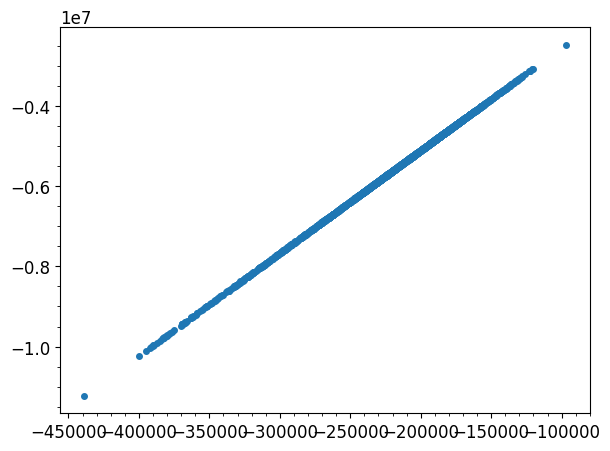

In [23]:
# vale per ogni colonna (zc, stft, mfcc, ecc)
plt.scatter(df['mfcc_sum'], df["frame_count"]*df['mfcc_mean'])
plt.show()

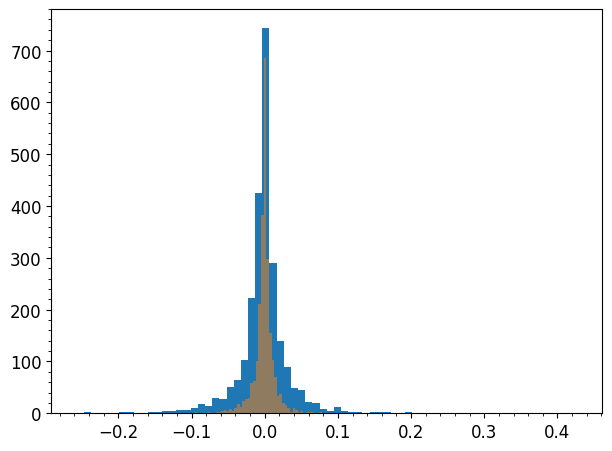

In [24]:
plt.hist(df['lag1_sum_w3'], bins=70)
lag1_sum_w3_logmodtransf = np.sign(df["lag1_sum_w3"])*np.log10(np.abs(df["lag1_sum_w3"]) + 1)
plt.hist(lag1_sum_w3_logmodtransf, alpha=0.5, bins=70)
#plt.xscale('log')
plt.show()

In [25]:
len(df[df['stft_min'] == 0])

1021

## Mutual information

In [26]:
categoric_attr_list = [column for column in df.columns if not is_numeric_dtype(df[column])]
categoric_attr_list

['vocal_channel',
 'emotion',
 'emotional_intensity',
 'statement',
 'repetition',
 'actor',
 'sex']

In [27]:
df_binned = pd.DataFrame(columns=numeric_attr_list)
for column in numeric_attr_list:

    try:
        df_binned[column] = pd.qcut(df[column], q=10)
    except ValueError:
        print(column, file=sys.stderr)

q50
lag1_sum
lag1_mean
lag1_q25
lag1_q75
zc_q95
mfcc_q50
mfcc_q75
sc_min
sc_q01
sc_q05
stft_min
stft_q01
stft_q05
q05_w1
q25_w1
q50_w1
q75_w1
q95_w1
lag1_sum_w1
lag1_mean_w1
lag1_q01_w1
lag1_q05_w1
lag1_q25_w1
lag1_q75_w1
lag1_q95_w1
lag1_q99_w1
zc_q75_w1
zc_q95_w1
zc_q99_w1
mfcc_min_w1
mfcc_q01_w1
mfcc_q25_w1
mfcc_q50_w1
mfcc_q75_w1
sc_min_w1
sc_q01_w1
sc_q05_w1
sc_q25_w1
sc_q50_w1
stft_min_w1
stft_max_w1
stft_q01_w1
stft_q05_w1
stft_q25_w1
stft_q50_w1
stft_q95_w1
stft_q99_w1
q50_w2
lag1_q50_w2
zc_q75_w2
zc_q95_w2
q50_w3
lag1_q50_w3
zc_q95_w3
q25_w4
q50_w4
q75_w4
lag1_q01_w4
lag1_q05_w4
lag1_q25_w4
lag1_q75_w4
lag1_q95_w4
lag1_q99_w4
zc_q75_w4
zc_q95_w4
zc_q99_w4
stft_q95_w4


In [28]:
df_binned = df_binned.dropna(axis=1, how='all')

In [29]:
# from sklearn.metrics import adjusted_mutual_info_score as ami

# df_ami = pd.DataFrame(columns=['num', 'cat', 'ami'])
# for column_i in df_binned.columns:
#     for column_j in categoric_attr_list:
#         row = dict(num=column_i, cat=column_j, ami=ami(df_binned[column_i], df[column_j]))
#         row = pd.DataFrame(row, index=[0])
#         df_ami = pd.concat([df_ami, row])

In [30]:
# df_ami.sort_values('ami', ascending=False)

## Correlated features

In [31]:
prefixes = [
    'sum',
    'mean',
    'std',
    'min',
    'max',
    'kur',
    'skew',
    'lag1',
    'zc',
    'mfcc',
    'sc',
    'stft',
    'length',
    'q'
]

In [32]:
def redirect_to_file(filename, str_to_redirect):
    path = os.path.join(DATA_FOLDER, filename)
    with open(path, 'w') as f:
        f.write(str_to_redirect)

In [33]:
corr = df[numeric_attr_list].corr(method='spearman')
display(corr.head())
corr_dict = dict(corr)

for key in corr_dict.keys():
    series = corr_dict[key]
    if len(series[(series.abs() > 0.95)].drop(key)) > 0:
        corr_dict[key] = series[(series.abs() > 0.95)].drop(key) # Drops the autocorrelation
# display(corr_dict)

,frame_count,sum,mean,std,min,max,q01,q05,q25,q50,...,stft_std_w4,stft_min_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
frame_count,1.000000,0.036158,0.045056,0.321882,-0.190115,0.180520,-0.292354,-0.374691,-0.703040,0.004680,...,0.734667,-0.692240,-0.687681,-0.734732,-0.624345,-0.481688,-0.384810,-0.060742,-0.426852,0.101367
sum,0.036158,1.000000,0.999025,0.176411,-0.163471,0.175029,-0.165350,-0.165067,-0.128933,0.011284,...,0.021214,-0.039195,-0.036044,-0.024901,-0.036056,-0.047771,-0.071233,0.020005,-0.019858,0.033417
mean,0.045056,0.999025,1.000000,0.177691,-0.163964,0.175345,-0.166422,-0.166983,-0.132294,0.011218,...,0.028308,-0.046425,-0.043410,-0.031805,-0.042469,-0.052980,-0.075647,0.017848,-0.024217,0.034715
std,0.321882,0.176411,0.177691,1.000000,-0.961377,0.954496,-0.997091,-0.992325,-0.687525,0.066223,...,0.284948,-0.233518,-0.231862,-0.276888,-0.327142,-0.343688,-0.296157,0.010408,-0.212029,0.173978
min,-0.190115,-0.163471,-0.163964,-0.961377,1.000000,-0.984137,0.967421,0.929302,0.576906,-0.063732,...,-0.149351,0.099010,0.093872,0.134361,0.224607,0.272729,0.239599,-0.026023,0.139807,-0.167532


In [34]:
corr_by_prefixes = dict()

for prefix in prefixes:
    corr_by_prefixes[prefix] = dict()
    for key in corr_dict.keys():
        if key.startswith(prefix):
            corr_by_prefixes[prefix][key] = corr_dict[key]


In [35]:
to_write = ''

for prefix in corr_by_prefixes.keys():
    to_write += f'COLUMNS STARTING WITH PREFIX {prefix}:\n\n'

    for column in corr_by_prefixes[prefix].keys():
        series = corr_by_prefixes[prefix][column]

        to_write += f'\n\tCorrelated with {column}:\n'
        to_write += str(series) + '\n'

    to_write += '\n\n'

redirect_to_file('correlated_features.txt', to_write)

In [37]:
correlation_network = dict()

for attribute in corr_dict.keys():
    correlation_network[attribute] = dict()
    for other_attribute in corr_dict[attribute].index.values:
        correlation_network[attribute][other_attribute] = dict(weight=np.abs(corr_dict[attribute][other_attribute]))
# display(correlation_network)

import networkx as nx

G = nx.from_dict_of_dicts(correlation_network)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_shape="o", node_size=10)#facecolors='none', edgecolors='k')
nx.draw_networkx_edges(
    G, pos,
    arrows=True,
    width=0.5,
    connectionstyle="arc3,rad=0.1"  # <-- THIS IS IT
);


In [ ]:
nx.draw_networkx_labels(G, pos, correlation_network.keys(), font_size=22, font_color="whitesmoke")
